# Análise de Dados - Netflix

Para esse Business Case, vamos utilizar uma base de dados disponibilizada pela Netflix.

Sua tarefa é utilizar os conhecimentos adquiridos até agora para responder as perguntas abaixo.

O arquivo da base de dados está dispnível para download e também no site Kaggle.

[Link da base de dados - Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)

# Carregamento e tratamento dos dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_principal = pd.read_csv("netflix.csv", parse_dates=["date_added"])

In [3]:
df_principal.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [5]:
df = df_principal.copy()

## 1 - Quantos registros e quantas colunas existem no dataset?
Resposta: 8807 registros e 12 colunas

In [6]:
linhas,colunas = df.shape

In [7]:
print(f"Linhas: {linhas}")
print(f"Colunas: {colunas}")

Linhas: 8807
Colunas: 12


## 2- Existem colunas com valores ausentes? Quais?
Resposta: Sim, Director, cast, country, date_addead

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
df.isnull().sum() / linhas * 100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

## 3 - Quantas séries (TV Show) e quantos filmes (Movie) estão disponíveis?
Resposta: Movie - 6131, TV Show - 2676


In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<Axes: title={'center': 'Tipo de Titulos'}, ylabel='type'>

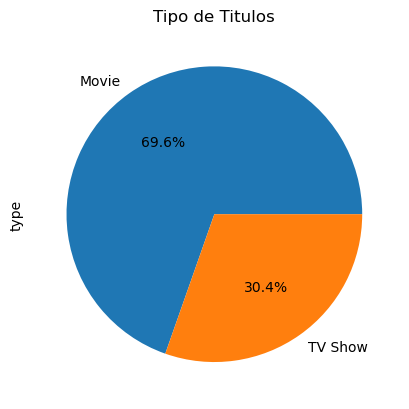

In [11]:
df["type"].value_counts().plot(kind="pie", title="Tipo de Titulos", autopct="%1.1f%%")


## 4 - Quantos registros no dataset estão sem o país especificado? Liste os seus tipos (filme ou série de tv) e quantidades.

In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
sem_pais_especificado = df.loc[df["country"].isna()]

In [14]:
sem_pais_especificado['type'].value_counts()

Movie      440
TV Show    391
Name: type, dtype: int64

<Axes: >

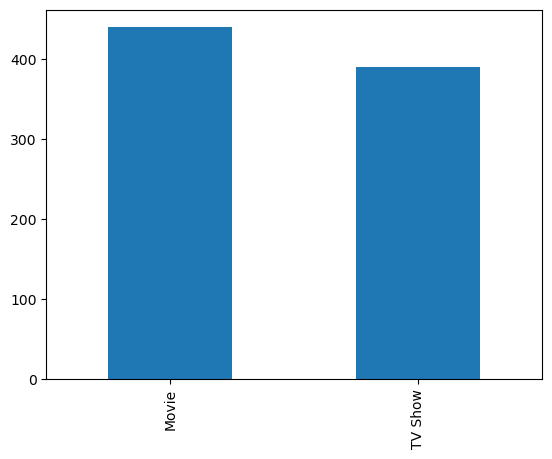

In [15]:
sem_pais_especificado['type'].value_counts().plot(kind="bar")

## 5 - Qual a data do primeiro filme disponibilizado e qual o seu título e país?
Resposta: Primeiro Filme disponibilizado 2008-01-01, Titul: To and From New York, País:  United States

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
df['date_added'].min()

Timestamp('2008-01-01 00:00:00')

In [18]:
filtro = df['date_added'] == df['date_added'].min()

In [19]:
df[filtro]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5957,s5958,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."


In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [21]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## 6 - Qual o diretor com maior número de títulos (filme ou série)? Qual o seu país?
Resposta: Maior Diretor -- Rajiv Chilaka  || País = India

In [22]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [23]:
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [24]:
diretor_mais_titulos = df.loc[df['director'] == 'Rajiv Chilaka']

In [25]:
df.query("director == 'Rajiv Chilaka'")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,2021-07-22,2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-07-22,2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


## 7 - Qual é o filme de maior duração? E o de menor duração?
Resposta:
Menor duracao Silent - 3 min  e Black Mirror: The School of Mischief 253min

In [26]:
df.loc[[5541, 5794, 5813], "duration"] = ["74 min", "84 min", "66 min"]

In [27]:
df.loc[[5541, 5794, 5813], "rating"] = np.nan

In [28]:
filmes = df.loc[df["type"] == "Movie"].copy()

In [29]:
filmes.loc[[5541, 5794, 5813], "rating"]

5541    NaN
5794    NaN
5813    NaN
Name: rating, dtype: object

In [30]:
filmes["duracao_min"] = filmes['duration'].str.replace(" min", "").astype(np.int64) 

In [31]:
filmes.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duracao_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127


In [32]:
filmes['duracao_min'].min()

3

In [33]:
filmes['duracao_min'].sort_values(ascending=False)

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [34]:
filmes.loc[2491]

show_id                                                     s2492
type                                                        Movie
title                                      The School of Mischief
director                                   Houssam El-Din Mustafa
cast            Suhair El-Babili, Adel Emam, Saeed Saleh, Youn...
country                                                     Egypt
date_added                                    2020-05-21 00:00:00
release_year                                                 1973
rating                                                      TV-14
duration                                                  253 min
listed_in                  Comedies, Dramas, International Movies
description     A high school teacher volunteers to transform ...
duracao_min                                                   253
Name: 2491, dtype: object

In [35]:
filmes.query("duracao_min == 3")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duracao_min
3777,s3778,Movie,Silent,"Limbert Fabian, Brandon Oldenburg",NaN,United States,2019-06-04,2014,TV-Y,3 min,"Children & Family Movies, Sci-Fi & Fantasy","""Silent"" is an animated short film created by ...",3


## 8 - Qual o tempo médio de duração de um filme?
Resposta: Tempo médio é de 99.57


<Axes: xlabel='duracao_min'>

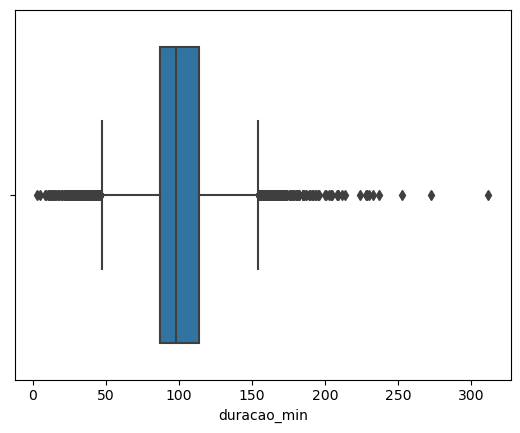

In [36]:
sns.boxplot(x=filmes['duracao_min'])

In [37]:
filmes['duracao_min'].sort_values(ascending=False)

4253    312
717     273
2491    253
2487    237
2484    233
       ... 
3535     10
1557      9
1484      8
2713      5
3777      3
Name: duracao_min, Length: 6131, dtype: int64

In [38]:
filmes.loc[717]

show_id                                                      s718
type                                                        Movie
title                                 Headspace: Unwind Your Mind
director                                                      NaN
cast            Andy Puddicombe, Evelyn Lewis Prieto, Ginger D...
country                                                       NaN
date_added                                    2021-06-15 00:00:00
release_year                                                 2021
rating                                                       TV-G
duration                                                  273 min
listed_in                                           Documentaries
description     Do you want to relax, meditate or sleep deeply...
duracao_min                                                   273
Name: 717, dtype: object

In [39]:
filmes.loc[717, 'duracao_min'] = 15

In [40]:
filmes['duracao_min'].describe()

count    6131.000000
mean       99.522916
std        28.223287
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duracao_min, dtype: float64

In [41]:
filmes['duracao_min'].mean()

99.52291632686348

## 9 - Liste os 3 países que produzem a maior quantidade de Séries (TV Show).
Os três países que produzem mais séries:
United States                                    760
United Kingdom                                   213
Japan                                            169


In [42]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [43]:
series = df.loc[df['type'] == "TV Show"]

In [44]:
series['country'].value_counts()

United States                                    760
United Kingdom                                   213
Japan                                            169
South Korea                                      158
India                                             79
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: country, Length: 196, dtype: int64

## 10 - Em qual ano  temos o maior número de séries e filmes brasileiros disponibilizados na Netflix?
Resposta: 2020

In [45]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
brazil = df.loc[df['country'].str.contains("Brazil", na=False)].copy()

In [47]:
brazil['country'].value_counts()

Brazil                                                            77
Brazil, France                                                     2
Italy, Brazil, Greece                                              1
United States, Brazil, South Korea, Mexico, Japan, Germany         1
United Kingdom, Brazil, Germany                                    1
Brazil, India, China, United States                                1
United States, Greece, Brazil                                      1
United States, Brazil                                              1
Brazil, France, Germany                                            1
Brazil, Netherlands, United States, Colombia, Austria, Germany     1
Argentina, Brazil, France, Poland, Germany, Denmark                1
Canada, Brazil                                                     1
Denmark, Brazil, France, Portugal, Sweden                          1
Brazil, United States                                              1
Brazil, United Kingdom            

<Axes: >

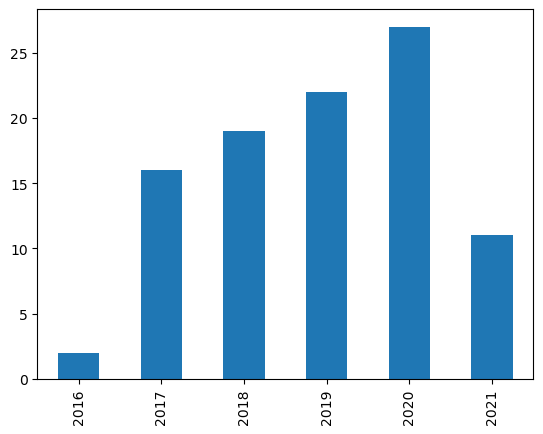

In [48]:
brazil['date_added'].dt.year.value_counts().sort_index().plot(kind="bar")

<Axes: >

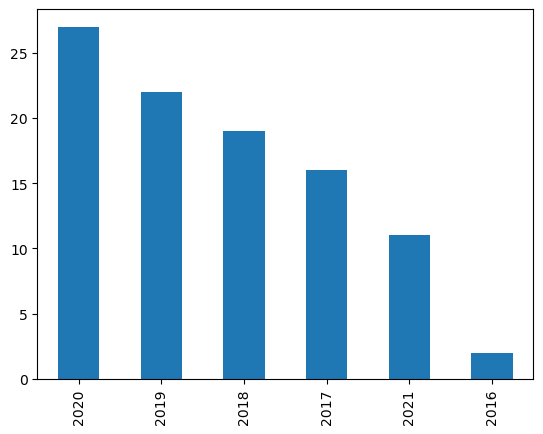

In [49]:
brazil['date_added'].dt.year.value_counts().plot(kind="bar")

## 11 - Qual(ais) o(s) diretor(es) brasileiro(s) com o maior número de títulos (filme/série)?
Resposta:
Lucas Margutti                  3
Diego Pignataro                 3

In [50]:
brazil['director'].value_counts()

Lucas Margutti                  3
Diego Pignataro                 3
Marcelo Galvão                  2
Alexandre Avancini              2
Bruno Garotti                   2
                               ..
Petra Costa, Lea Glob           1
Wagner de Assis                 1
Fernando Ayllón                 1
Cavi Borges, Luciano Vidigal    1
Tiffanie Hsu                    1
Name: director, Length: 61, dtype: int64

## 12 - Existem mais conteúdos para adultos ou para crianças e adolescentes?
-- Existem mais conteúdos para crianças: 5510

In [64]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [52]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [59]:
crianca_adolescente = ['PG-13', 'PG', 'TV-PG', 'TV-Y', 'TV-Y7','TV-G', 'G','TV-Y7-FV', 'UR', 'TV-14', 'R']
adulto = ['TV-MA', 'NR']

In [62]:
#Conteúdos para crianças e adolescentes
df.query("rating in @crianca_adolescente").shape

(5510, 12)

In [63]:
#Conteúdo para adultos
df.query("rating in @adulto").shape

(3287, 12)